# **Data Preprocessing**

## 01- Move all dataset to one base directory

In [ ]:
dataset = '/content/drive/MyDrive/Graduation Project DataSet/أمراض الجلدية'
base_dir = '/content/drive/MyDrive/Graduation Project DataSet/أمراض الجلدية/base_dir'
insect_allergy = '/content/drive/MyDrive/Graduation Project DataSet/أمراض الجلدية/Insect Allergy'
bacteria_infection = '/content/drive/MyDrive/Graduation Project DataSet/أمراض الجلدية/Bacterial infection'

In [ ]:
# Insect Allergy
count = 0
for i in os.listdir(insect_allergy):
  count += 1
  # print(insect_allergy+'/'+i)  # print file pathes with its names
  shutil.copy(insect_allergy+'/'+i, base_dir)
  if count == 135:
    break


In [ ]:
# bacteria infection
count = 1
for i in os.listdir(bacteria_infection):
  count += 1
  # print(bacteria_infection+'/'+i)
  shutil.copy(bacteria_infection+'/'+i, base_dir)
  if count == 135:
    break

In [ ]:
len(os.listdir(base_dir))

## 02- Create train, validation and test directories for each class

In [ ]:
import os, shutil
# The path to the directory where the original dataset was uncompressed
original_dataset_dir = '/content/drive/MyDrive/Graduation Project DataSet/أمراض الجلدية/base_dir'

# The directory where we will store our smaller dataset
base_dir = original_dataset_dir + '/Skin_Diseases'
try:
  os.mkdir(base_dir)
except:
  pass

# Directories for our training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
try:
  os.mkdir(train_dir)
except:
  pass  
validation_dir = os.path.join(base_dir, 'validation')
try:
  os.mkdir(validation_dir)
except:
  pass   
test_dir = os.path.join(base_dir, 'test')
try:
  os.mkdir(test_dir)
except:
  pass   

# Directory with our training Allergy pictures
train_allergy_dir = os.path.join(train_dir, 'Allergy')
try:
  os.mkdir(train_allergy_dir)
except:
  pass   

# Directory with our training Bacteria pictures
train_bacteria_dir = os.path.join(train_dir, 'Bacteria')
try:
  os.mkdir(train_bacteria_dir)
except:
  pass   

# Directory with our validation Allergy pictures
validation_allergy_dir = os.path.join(validation_dir, 'Allergy')
try:
  os.mkdir(validation_allergy_dir)
except:
  pass 

# Directory with our validation Bacteria pictures
validation_bacteria_dir = os.path.join(validation_dir, 'Bacteria')
try:
  os.mkdir(validation_bacteria_dir)
except:
  pass   

# Directory with our validation Allergy pictures
test_allergy_dir = os.path.join(test_dir, 'Allergy')
try:
  os.mkdir(test_allergy_dir)
except:
  pass   

# Directory with our validation Bacteria pictures
test_bacteria_dir = os.path.join(test_dir, 'Bacteria')
try:
  os.mkdir(test_bacteria_dir)
except:
  pass   


## 03- Move dataset from base directory to train, test and validation Directories

In [ ]:
# Copy first 60 allergy images to train_allergy_dir
fnames = ['Allergy_{}.jpg'.format(i+1) for i in range(80)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_allergy_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 20 allergy images to validation_cats_dir
fnames = ['Allergy_{}.jpg'.format(i) for i in range(80, 115)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_allergy_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 20 allergy images to test_cats_dir
fnames = ['Allergy_{}.jpg'.format(i) for i in range(115, 135)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_allergy_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 60 bacteria images to train_bacteria_dir
fnames = ['Bacteria_{}.jpg'.format(i+1) for i in range(80)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_bacteria_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 20 bacteria images to validation_dogs_dir
fnames = ['Bacteria_{}.jpg'.format(i) for i in range(80, 115)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_bacteria_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 20 bacteria images to test_dogs_dir
fnames = ['Bacteria_{}.jpg'.format(i) for i in range(115, 135)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_bacteria_dir, fname)
    shutil.copyfile(src, dst)

# **Convulution Neural Network**

## 01- Check Images

In [ ]:
import os

print('total training Allergy images:', len(os.listdir('/content/drive/MyDrive/Graduation Project DataSet/أمراض الجلدية/base_dir/Skin_Diseases/train/Allergy')))
print('total validation Allergy images:', len(os.listdir('/content/drive/MyDrive/Graduation Project DataSet/أمراض الجلدية/base_dir/Skin_Diseases/validation/Allergy')))
print('total testing Allergy images:', len(os.listdir('/content/drive/MyDrive/Graduation Project DataSet/أمراض الجلدية/base_dir/Skin_Diseases/test/Allergy')))

print('------------------------------------------------------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------------------------------------------------------')

print('total training Bacteria images:', len(os.listdir('/content/drive/MyDrive/Graduation Project DataSet/أمراض الجلدية/base_dir/Skin_Diseases/train/Bacteria')))
print('total validation Bacteria images:', len(os.listdir('/content/drive/MyDrive/Graduation Project DataSet/أمراض الجلدية/base_dir/Skin_Diseases/validation/Bacteria')))
print('total testing Bacteria images:', len(os.listdir('/content/drive/MyDrive/Graduation Project DataSet/أمراض الجلدية/base_dir/Skin_Diseases/test/Bacteria')))

total training Allergy images: 80
total validation Allergy images: 35
total testing Allergy images: 20
------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------
total training Bacteria images: 80
total validation Bacteria images: 35
total testing Bacteria images: 20


## 02- Building our network Architecutre

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## 03- Compile Network

In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

 ## 04- Reading images


In [ ]:
train_dir = '/content/drive/MyDrive/Graduation Project DataSet/أمراض الجلدية/base_dir/Skin_Diseases/train'
validation_dir = '/content/drive/MyDrive/Graduation Project DataSet/أمراض الجلدية/base_dir/Skin_Diseases/validation'

## 05- ImageDataGenerator as DataLoader

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 160 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=16,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=7)


Epoch 1/100
16/16 [==============================] - 69s 4s/step - loss: 0.7099 - acc: 0.4625 - val_loss: 0.6890 - val_acc: 0.6286
Epoch 2/100
16/16 [==============================] - 22s 1s/step - loss: 0.6802 - acc: 0.6000 - val_loss: 0.6775 - val_acc: 0.6571
Epoch 3/100
16/16 [==============================] - 21s 1s/step - loss: 0.6615 - acc: 0.6313 - val_loss: 0.6583 - val_acc: 0.6714
Epoch 4/100
16/16 [==============================] - 22s 1s/step - loss: 0.6198 - acc: 0.7188 - val_loss: 0.6685 - val_acc: 0.5143
Epoch 5/100
16/16 [==============================] - 21s 1s/step - loss: 0.5911 - acc: 0.6938 - val_loss: 0.6210 - val_acc: 0.6286
Epoch 6/100
16/16 [==============================] - 22s 1s/step - loss: 0.5342 - acc: 0.8000 - val_loss: 0.6755 - val_acc: 0.5714
Epoch 7/100
16/16 [==============================] - 22s 1s/step - loss: 0.5009 - acc: 0.7875 - val_loss: 0.5829 - val_acc: 0.7143
Epoch 8/100
16/16 [==============================] - 22s 1s/step - loss: 0.4774 - a

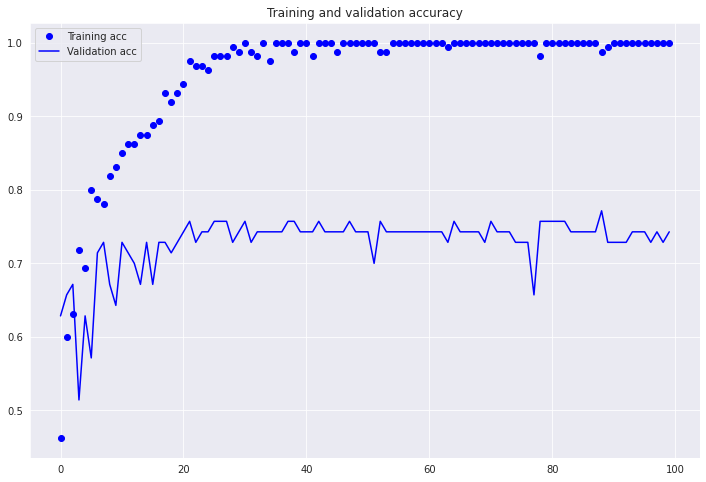

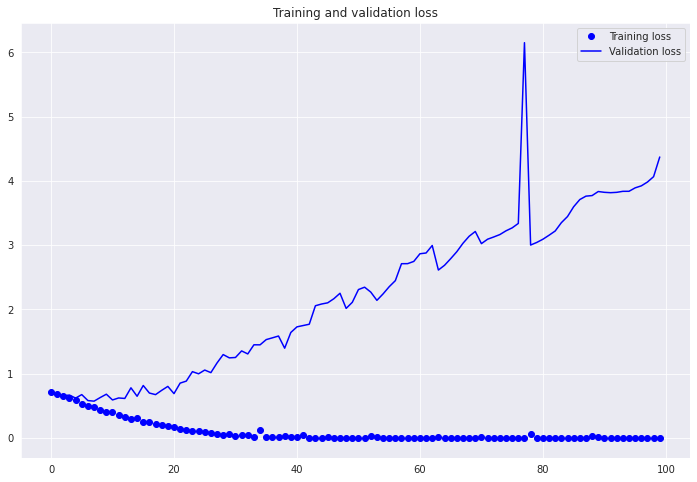

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(12, 8))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12, 8))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **Data Aumgentaion**

## 01- Building our network Architecutre

In [ ]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## 02- ImageDataGenerator as Data Augmention

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')



validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=16,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=7)

Found 160 images belonging to 2 classes.
Found 70 images belonging to 2 classes.
Epoch 1/100
16/16 [==============================] - 23s 1s/step - loss: 0.6841 - acc: 0.5437 - val_loss: 0.6874 - val_acc: 0.5000
Epoch 2/100
16/16 [==============================] - 21s 1s/step - loss: 0.6848 - acc: 0.5375 - val_loss: 0.6846 - val_acc: 0.5143
Epoch 3/100
16/16 [==============================] - 23s 1s/step - loss: 0.6810 - acc: 0.5375 - val_loss: 0.6647 - val_acc: 0.6429
Epoch 4/100
16/16 [==============================] - 22s 1s/step - loss: 0.6702 - acc: 0.5875 - val_loss: 0.6559 - val_acc: 0.6857
Epoch 5/100
16/16 [==============================] - 23s 1s/step - loss: 0.6628 - acc: 0.5938 - val_loss: 0.6658 - val_acc: 0.6429
Epoch 6/100
16/16 [==============================] - 23s 1s/step - loss: 0.6753 - acc: 0.6000 - val_loss: 0.6279 - val_acc: 0.7000
Epoch 7/100
16/16 [==============================] - 21s 1s/step - loss: 0.6561 - acc: 0.6187 - val_loss: 0.6265 - val_acc: 0.6429
Ep

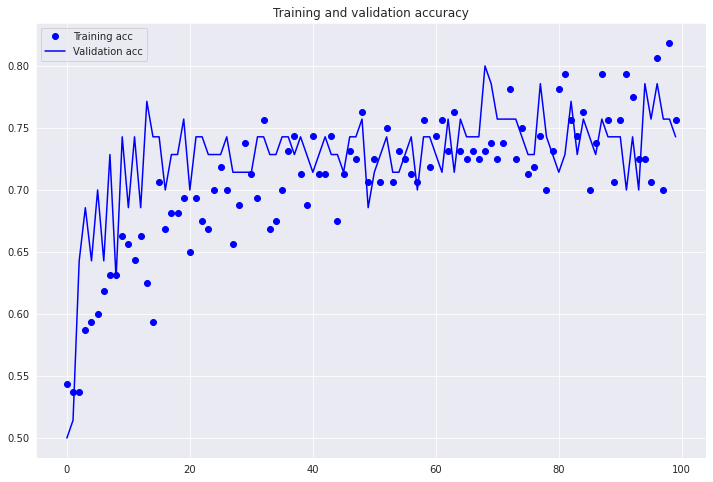

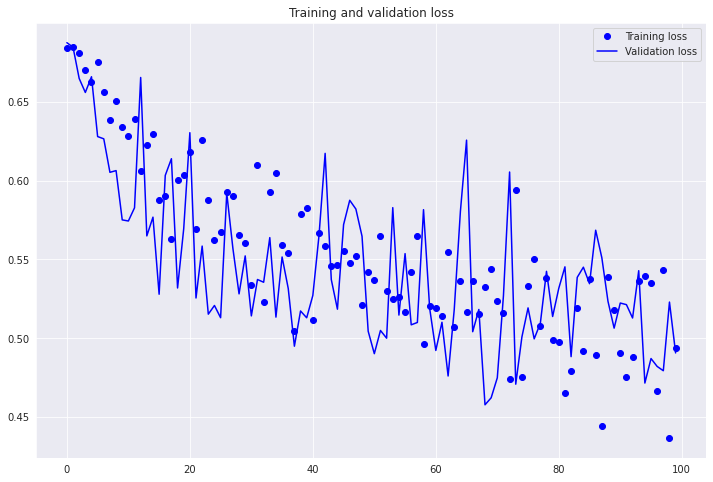

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(12, 8))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12, 8))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **Transfer Learning**

## 01- VGG16

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(200, 200, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 256)               4718848   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 19,433,793
Trainable params: 19,433,793
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('This is the number of trainable weights ' 'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [ ]:
conv_base.trainable = False

In [ ]:
print('This is the number of trainable weights ' 'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 256)               4718848   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 19,433,793
Trainable params: 4,719,105
Non-trainable params: 14,714,688
_________________________________________________________________


ImageDataGenerator as Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
from keras import optimizers


train_datagen = ImageDataGenerator(
      #rescale=1./255,
      preprocessing_function=preprocess_input,
      rotation_range=40, 
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)#rescale=1./255) # Issue: https://github.com/fchollet/deep-learning-with-python-notebooks/issues/21

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(200, 200),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])



Found 160 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


In [ ]:
%%time
history = model.fit(
      train_generator,
      steps_per_epoch=16,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=7,
      verbose=2)

Epoch 1/50
16/16 - 61s - loss: 2.2871 - acc: 0.6187 - val_loss: 1.8232 - val_acc: 0.7000 - 61s/epoch - 4s/step
Epoch 2/50
16/16 - 23s - loss: 1.6016 - acc: 0.7125 - val_loss: 1.6090 - val_acc: 0.6857 - 23s/epoch - 1s/step
Epoch 3/50
16/16 - 24s - loss: 1.6155 - acc: 0.6625 - val_loss: 1.4520 - val_acc: 0.7000 - 24s/epoch - 1s/step
Epoch 4/50
16/16 - 22s - loss: 1.5286 - acc: 0.6875 - val_loss: 1.5454 - val_acc: 0.6857 - 22s/epoch - 1s/step
Epoch 5/50
16/16 - 24s - loss: 0.8825 - acc: 0.8125 - val_loss: 1.4915 - val_acc: 0.7143 - 24s/epoch - 1s/step
Epoch 6/50
16/16 - 24s - loss: 1.1167 - acc: 0.7375 - val_loss: 1.8278 - val_acc: 0.7000 - 24s/epoch - 1s/step
Epoch 7/50
16/16 - 29s - loss: 1.0837 - acc: 0.7312 - val_loss: 1.3933 - val_acc: 0.7429 - 29s/epoch - 2s/step
Epoch 8/50
16/16 - 24s - loss: 0.9876 - acc: 0.7875 - val_loss: 1.2709 - val_acc: 0.7571 - 24s/epoch - 1s/step
Epoch 9/50
16/16 - 23s - loss: 0.6438 - acc: 0.8188 - val_loss: 1.4492 - val_acc: 0.7429 - 23s/epoch - 1s/step
E

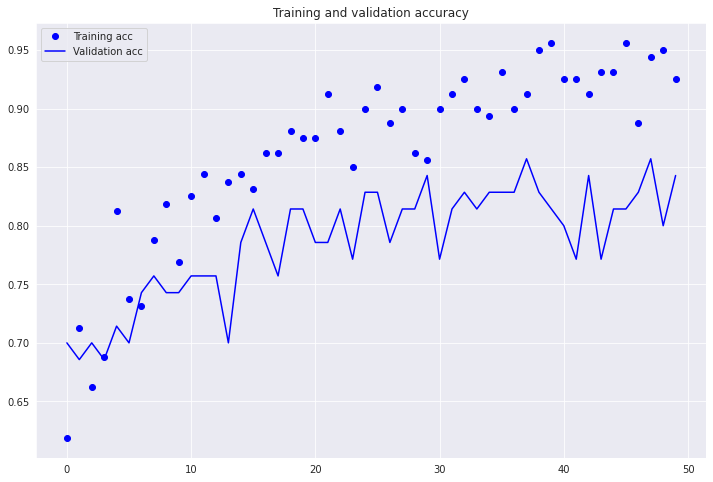

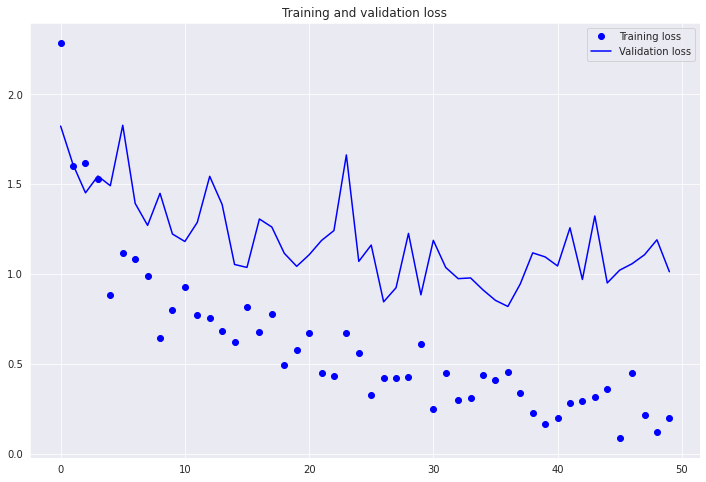

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(12, 8))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12, 8))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 02- MobileNet

In [ ]:
mobilenet = tf.keras.applications.mobilenet.MobileNet(input_shape=(224 , 224, 3),
                                           include_top=False,
                                           weights='imagenet')

model = Sequential()
model.add(mobilenet)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(4, activation="softmax" , name="classification"))

In [ ]:
from keras.applications import MobileNet

conv_base = MobileNet(input_shape=(224 , 224, 3),
                                           include_top=False,
                                           weights='imagenet')

In [ ]:
conv_base.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation="relu"))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid" ))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dense_8 (Dense)             (None, 1)                

In [ ]:
print('This is the number of trainable weights ' 'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 87


In [ ]:
conv_base.trainable = False

In [ ]:
print('This is the number of trainable weights ' 'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 6


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dense_8 (Dense)             (None, 1)                

ImageDataGenerator as Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
from keras import optimizers


train_datagen = ImageDataGenerator(
      #rescale=1./255,
      preprocessing_function=preprocess_input,
      rotation_range=40, 
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)#rescale=1./255) # Issue: https://github.com/fchollet/deep-learning-with-python-notebooks/issues/21

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=10,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])



Found 160 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


In [ ]:
%%time
history = model.fit(
      train_generator,
      steps_per_epoch=16,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=7,
      verbose=2)

Epoch 1/30
16/16 - 27s - loss: 0.7148 - acc: 0.5063 - val_loss: 0.7223 - val_acc: 0.4857 - 27s/epoch - 2s/step
Epoch 2/30
16/16 - 24s - loss: 0.6697 - acc: 0.5750 - val_loss: 0.6985 - val_acc: 0.5429 - 24s/epoch - 1s/step
Epoch 3/30
16/16 - 23s - loss: 0.6472 - acc: 0.6187 - val_loss: 0.6640 - val_acc: 0.6429 - 23s/epoch - 1s/step
Epoch 4/30
16/16 - 24s - loss: 0.6251 - acc: 0.6750 - val_loss: 0.6318 - val_acc: 0.6714 - 24s/epoch - 2s/step
Epoch 5/30
16/16 - 24s - loss: 0.5981 - acc: 0.6687 - val_loss: 0.6285 - val_acc: 0.6571 - 24s/epoch - 2s/step
Epoch 6/30
16/16 - 24s - loss: 0.5900 - acc: 0.7375 - val_loss: 0.5988 - val_acc: 0.6857 - 24s/epoch - 1s/step
Epoch 7/30
16/16 - 23s - loss: 0.5602 - acc: 0.7312 - val_loss: 0.5948 - val_acc: 0.6429 - 23s/epoch - 1s/step
Epoch 8/30
16/16 - 24s - loss: 0.5326 - acc: 0.7688 - val_loss: 0.5874 - val_acc: 0.6429 - 24s/epoch - 1s/step
Epoch 9/30
16/16 - 24s - loss: 0.5387 - acc: 0.7688 - val_loss: 0.6193 - val_acc: 0.6571 - 24s/epoch - 1s/step
E

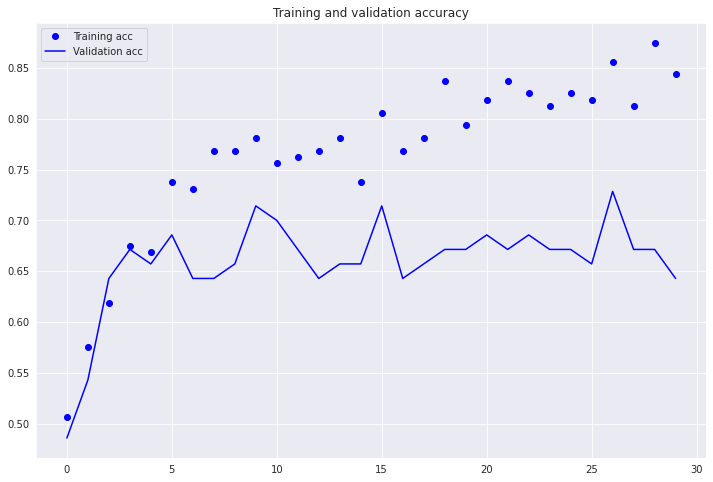

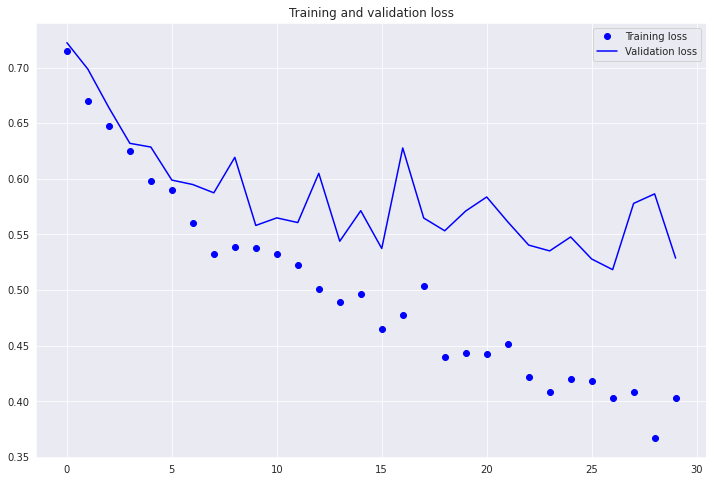

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(12, 8))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12, 8))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()